In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)

In [10]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu',
                             padding = 'same', input_shape = (28, 28, 1)))

In [11]:
model.add(keras.layers.MaxPooling2D(2))

In [12]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu',
                              padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [13]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

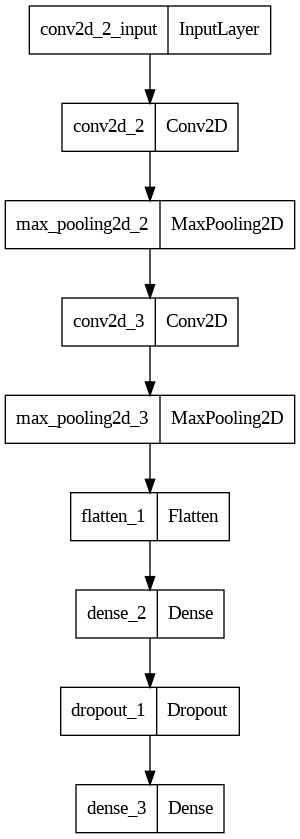

In [15]:
keras.utils.plot_model(model)

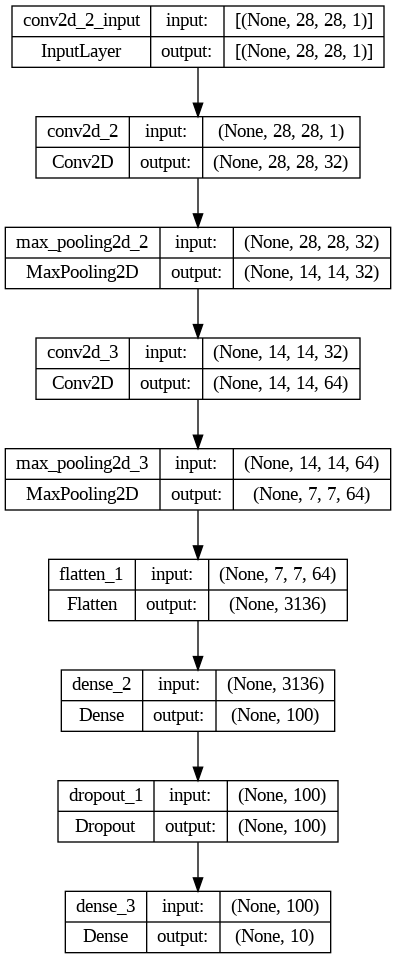

In [16]:
keras.utils.plot_model(model, show_shapes = True)

In [18]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                  restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 101s 66ms/step - loss: 0.5078 - accuracy: 0.8189 - val_loss: 0.3257 - val_accuracy: 0.8798
Epoch 2/20
1500/1500 [==============================] - 84s 56ms/step - loss: 0.3387 - accuracy: 0.8782 - val_loss: 0.2682 - val_accuracy: 0.9000
Epoch 3/20
1500/1500 [==============================] - 119s 79ms/step - loss: 0.2901 - accuracy: 0.8944 - val_loss: 0.2542 - val_accuracy: 0.9048
Epoch 4/20
1500/1500 [==============================] - 80s 53ms/step - loss: 0.2602 - accuracy: 0.9055 - val_loss: 0.2569 - val_accuracy: 0.9065
Epoch 5/20
1500/1500 [==============================] - 113s 75ms/step - loss: 0.2345 - accuracy: 0.9144 - val_loss: 0.2476 - val_accuracy: 0.9110
Epoch 6/20
1500/1500 [==============================] - 90s 60ms/step - loss: 0.2134 - accuracy: 0.9221 - val_loss: 0.2275 - val_accuracy: 0.9168
Epoch 7/20
1500/1500 [==============================] - 121s 81ms/step - loss: 0.1989 - accuracy: 0.9260 - val_loss: 0.21

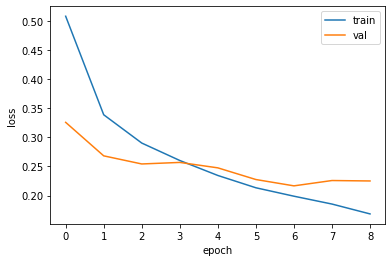

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 7s 18ms/step - loss: 0.2167 - accuracy: 0.9248


[0.21667490899562836, 0.924833357334137]

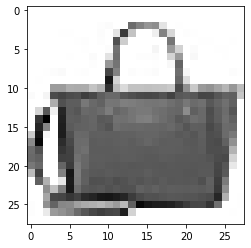

In [26]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap = 'gray_r')
plt.show()

In [27]:
preds = model.predict(val_scaled[0 : 1])
print(preds)

1/1 [==============================] - 0s 135ms/step
[[4.3631302e-16 7.2530031e-21 1.5294010e-17 2.2543172e-15 2.2033889e-16
  5.2463483e-14 1.0546513e-17 1.9190747e-13 1.0000000e+00 2.1589033e-14]]


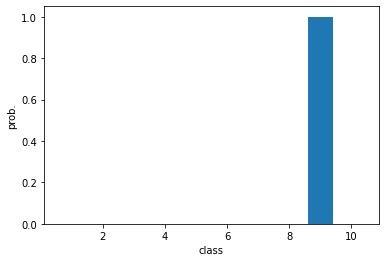

In [29]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [32]:
classes = ['티셔츠', '바지', '스웨터', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [33]:
import numpy as np
print(classes[np.argmax(preds)])

스니커즈


In [34]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [35]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 13ms/step - loss: 0.2436 - accuracy: 0.9159


[0.2435847967863083, 0.9158999919891357]